## **기본 분류: 의류 이미지 분류**

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


패션 MNIST 데이터셋 임포트하기

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

데이터 탐색

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

데이터 전처리

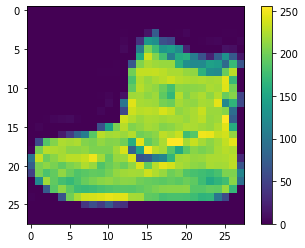

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

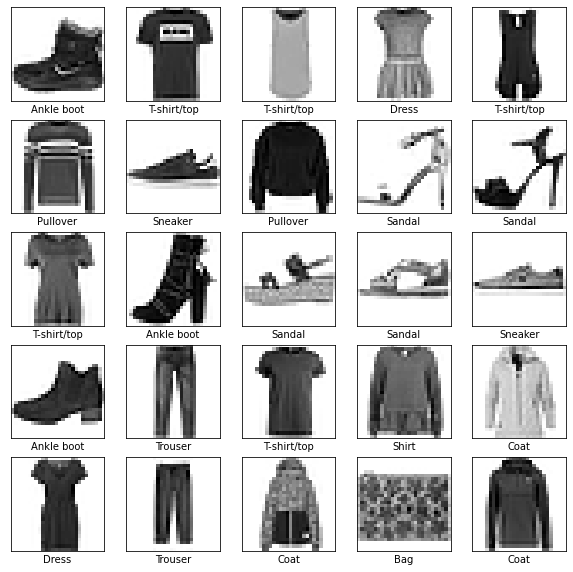

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

모델 구성

In [12]:
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10)
])

모델 컴파일

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

모델 훈련

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4942 - accuracy: 0.8262
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3754 - accuracy: 0.8641
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3345 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3118 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2943 - accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2798 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2686 - accuracy: 0.8980
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2587 - accuracy: 0.9033
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2492 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.240

정확도 평가

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3591 - accuracy: 0.8758 - 554ms/epoch - 2ms/step

Test accuracy: 0.8758000135421753


예측하기

In [16]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(test_images)

In [18]:
# 첫 번째 예측 확인
predictions[0]

array([2.2250607e-07, 1.3481743e-09, 2.3011300e-09, 3.4817754e-10,
       9.6039919e-11, 7.0718565e-04, 7.7398437e-07, 6.3829646e-03,
       5.3223157e-06, 9.9290353e-01], dtype=float32)

In [19]:
# 가장 높은 신뢰도를 가진 레이블
np.argmax(predictions[0])

9

In [20]:
# 테스트 레이블 확인
test_labels[0]

9

In [23]:
# 10개 클래스에 대한 예측 시각화
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color= 'blue'
    else:
        color= 'red'
    plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)
    
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

예측 확인

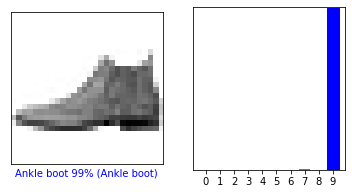

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

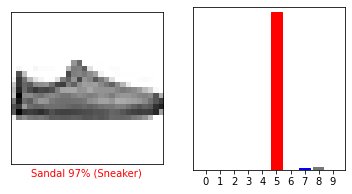

In [26]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

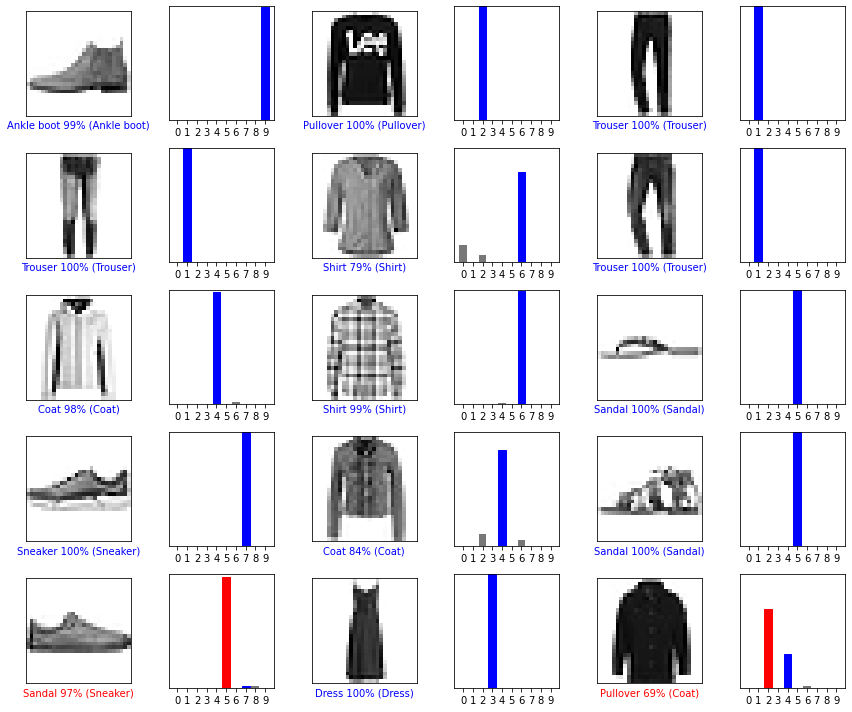

In [27]:
# 올바르게 예측된 레이블은 파란색
# 잘못 예측된 레이블은 빨간색
# 숫자는 예측 레이블의 신뢰도 퍼센트(100점 만점)

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

훈련된 모델 사용하기

In [28]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [29]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [30]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.6893212e-06 5.4613645e-18 9.9961829e-01 3.5308659e-11 1.1699712e-04
  7.0888131e-09 2.6296050e-04 1.7680855e-13 2.4252328e-10 3.7781962e-14]]


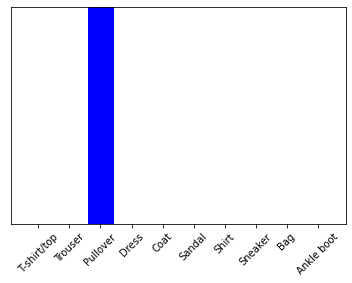

In [31]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [32]:
# 배치에서 유일한 이미지에 대한 예측 가져오기
np.argmax(predictions_single[0])

2